In [1]:
# import library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

import pymoo
from pymoo.core.problem import Problem

import joblib


from NSGA.problem_variables import ProblemVariables
from NSGA.variable_preprocess import variable_scaling, extract_variables
import numpy as np
import pandas as pd
import random
import math
import os

from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.optimize import minimize
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting


import csv
import os



In [ ]:

!chcp 65001 
!dir ..\\models_pycaret_0.1.9_3
# Volume in drive C has no label.
#  Volume Serial Number is B64E-A8F8

#  Directory of c:\Users\tsne\PythonProject\project2_ml\models_pycaret_0.1.9_3

# 2025-07-29  오후 03:23    <DIR>          .
# 2025-07-29  오후 03:23    <DIR>          ..
# 2025-07-29  오후 02:52           306,412 lgbm_B_mean_bottom_left_T.pkl
# 2025-07-29  오후 02:53           306,549 lgbm_B_mean_bottom_right_T.pkl
# 2025-07-29  오후 02:53           307,357 lgbm_B_mean_center_T.pkl
# 2025-07-29  오후 02:54           307,664 lgbm_B_mean_left_T.pkl
# 2025-07-29  오후 02:54           306,329 lgbm_B_mean_right_T.pkl
# 2025-07-29  오후 02:55           306,588 lgbm_B_mean_top_left_T.pkl
# 2025-07-29  오후 02:55           306,576 lgbm_B_mean_top_right_T.pkl
# 2025-07-29  오후 02:57           286,727 lgbm_Coreloss_W.pkl
# 2025-07-29  오후 02:57           312,898 lgbm_k1.pkl
# 2025-07-29  오후 02:58           312,909 lgbm_k2.pkl
# 2025-07-29  오후 02:59           304,478 lgbm_Llr1_uH.pkl
# 2025-07-29  오후 02:59           304,663 lgbm_Llr2_uH.pkl
# 2025-07-29  오후 03:01           290,716 lgbm_Llt_uH.pkl
# 2025-07-29  오후 03:03           288,115 lgbm_Lmr1_uH.pkl
# 2025-07-29  오후 03:04           288,120 lgbm_Lmr2_uH.pkl
# 2025-07-29  오후 03:06           280,696 lgbm_Lmt_uH.pkl
# 2025-07-29  오후 03:08           287,939 lgbm_Lrx1_uH.pkl
# 2025-07-29  오후 03:09           288,080 lgbm_Lrx2_uH.pkl
# 2025-07-29  오후 03:11           280,768 lgbm_Ltx_uH.pkl
# 2025-07-29  오후 03:13           283,942 lgbm_M1.pkl
# 2025-07-29  오후 03:14           283,843 lgbm_M2.pkl
# 2025-07-29  오후 03:16           289,724 lgbm_P1_Rx1_W.pkl
# 2025-07-29  오후 03:17           295,787 lgbm_P1_Rx2_W.pkl
# 2025-07-29  오후 03:19           286,594 lgbm_P1_Tx_W.pkl
# 2025-07-29  오후 03:20           302,145 lgbm_P2_Rx1_W.pkl
# 2025-07-29  오후 03:20           302,286 lgbm_P2_Rx2_W.pkl
# 2025-07-29  오후 03:21           293,738 lgbm_P2_Tx_W.pkl
# 2025-07-29  오후 03:23           285,144 lgbm_totalloss_W.pkl
#               28 File(s)      8,296,787 bytes
#                2 Dir(s)  90,105,319,424 bytes free

Active code page: 65001


 Volume in drive C has no label.
 Volume Serial Number is B64E-A8F8

 Directory of c:\Users\tsne\PythonProject\project2_ml\models_pycaret_0.1.9_3

2025-07-29  오후 03:23    <DIR>          .
2025-07-29  오후 03:23    <DIR>          ..
2025-07-29  오후 02:52           306,412 lgbm_B_mean_bottom_left_T.pkl
2025-07-29  오후 02:53           306,549 lgbm_B_mean_bottom_right_T.pkl
2025-07-29  오후 02:53           307,357 lgbm_B_mean_center_T.pkl
2025-07-29  오후 02:54           307,664 lgbm_B_mean_left_T.pkl
2025-07-29  오후 02:54           306,329 lgbm_B_mean_right_T.pkl
2025-07-29  오후 02:55           306,588 lgbm_B_mean_top_left_T.pkl
2025-07-29  오후 02:55           306,576 lgbm_B_mean_top_right_T.pkl
2025-07-29  오후 02:57           286,727 lgbm_Coreloss_W.pkl
2025-07-29  오후 02:57           312,898 lgbm_k1.pkl
2025-07-29  오후 02:58           312,909 lgbm_k2.pkl
2025-07-29  오후 02:59           304,478 lgbm_Llr1_uH.pkl
2025-07-29  오후 02:59           304,663 lgbm_Llr2_uH.pkl
2025-07-29  오후 03:01           290,7

In [ ]:
# import ML model

date = "250723"


import os

print("start")

model_names = [
  f"Lmt_{date}",
  f"Llt_{date}",
  f"copperloss_Tx_{date}",
  f"copperloss_Rx_{date}",
  f"coreloss_{date}",
  f"B_left_{date}",
  f"B_center_{date}",
  f"B_top_left_{date}",
  # f"resonance_frequency_{date}"
]

model_labels = [
  "Lmt",
  "Llt", 
  "copperloss_Tx",
  "copperloss_Rx",
  "coreloss",
  "B_left",
  "B_center",
  "B_top_left",
  # "resonance_frequency"
]

# dict에 담아서 관리
models = {}
for name, label in zip(model_names, model_labels):
  model_path = f"..\\regression model\\model\\{name}.pkl"
  
  # 파일 존재 여부 확인
  if not os.path.exists(model_path):
    print(f"모델 파일이 존재하지 않습니다: {model_path}")
    continue
    
  try:
    print(f"Loading model: {name}")
    models[label] = joblib.load(model_path)
  except Exception as e:
    print(f"모델 로딩 중 에러 발생: {name}")
    print(f"에러 메시지: {str(e)}")

core_df = pd.read_csv("core_parameter.csv", encoding="utf-8-sig")
N_CORE  = len(core_df)

start
Loading model: Lmt_250723
Loading model: Llt_250723
Loading model: copperloss_Tx_250723
Loading model: copperloss_Rx_250723
Loading model: coreloss_250723
Loading model: B_left_250723
Loading model: B_center_250723
Loading model: B_top_left_250723
Loading model: resonance_frequency_250723


In [ ]:
import numpy as np, random, math

SCALE  = np.array([1, 0.01, 0.1, 0.1, 0.035, 0.1,
           0.1, 0.1, 0.1, 0.1, 0.1,   0.1,
           1, 1], dtype=float)
OFFSET = np.array([0, 0,   0,   0,  0,  0,
           0, 0,   0,   0,   -10,   0,
           0, 0],  dtype=float)

def decode_vars(X_raw: np.ndarray) -> np.ndarray:
  """
  정수형 설계변수 → 실제 물리 단위로 변환.
  X_raw : shape (n, 14) 또는 (14,)
  """
  X = np.atleast_2d(X_raw).astype(float)
  return X * SCALE + OFFSET 

def random_split_turns(tx_turns: np.ndarray):
  """
  Tx/Rx 턴 수 '배열'이 주어지면, 각 해에 대해 조건을 만족하는
  [Tx_left, Rx_left, Tx_right, Rx_right] '배열'을 무작위로 생성한다.
  """
  tx_turns = np.asarray(tx_turns, dtype=int)
  rx_turns = np.rint(tx_turns * 1.4).astype(int)

  n = len(tx_turns)
  tx_left  = np.empty(n, dtype=int)
  rx_left  = np.empty(n, dtype=int)
  tx_right = np.empty(n, dtype=int)
  rx_right = np.empty(n, dtype=int)

  # 각 해(tx, rx)에 대해 개별적으로 유효한 조합을 찾는다.
  for i, (tx, rx) in enumerate(zip(tx_turns, rx_turns)):
    half = math.ceil((tx + rx) / 2)

    # 가능한 Tx_left 후보 목록 생성
    candidates = [tL for tL in range(2, 7)
            if 2 <= half - tL <= 6
            and 2 <= tx - tL   <= 6
            and 2 <= rx - (half - tL) <= 6]

    if not candidates:
      raise ValueError(f"[{i}] valid split 없음 (Tx={tx}, Rx={rx})")

    # 후보 중 하나를 무작위로 선택하여 배열에 저장
    tL = random.choice(candidates)
    rL = half - tL
    tx_left[i]   = tL
    rx_left[i]   = rL
    tx_right[i]  = tx - tL
    rx_right[i]  = rx - rL

  return tx_left, rx_left, tx_right, rx_right

def pre_processing_data(X_raw):
  X = decode_vars(X_raw)
  # ── 0. 입력 분해 (2D 배열 X) ────────────────────────────
  (Tx_turns, g2, Tx_coil_width, Rx_coil_width,
   coil_height, space_height, Tx_space_x, Tx_space_y,
   Rx_space_x, Rx_space_y, move_z, via_space,
   w1_number, core_idx) = X.T
  
  core_idx = core_idx.astype(int)

  # --- 코어 치수 (벡터 연산) --------------------------------
  F  = core_df.loc[core_idx, "F"].to_numpy()
  A  = core_df.loc[core_idx, "A"].to_numpy()
  B  = core_df.loc[core_idx, "B"].to_numpy()
  C  = core_df.loc[core_idx, "C"].to_numpy()
  D  = core_df.loc[core_idx, "D"].to_numpy()
  E  = core_df.loc[core_idx, "E"].to_numpy()
  g1 = core_df.loc[core_idx, "gap"].to_numpy()

  l1_leg  = (A - B) / 2
  l1_top  = D - E
  l2    = (B - C) / 2
  h1    = E * 2
  l1_center = C
  w1    = F * w1_number

  # ── 1. 좌/우 턴 수 결정 (벡터화된 함수 호출) ─────────────
  n = len(Tx_turns)
  Tx_turns_int = Tx_turns.astype(int)
  Tx_left, Rx_left, Tx_right, Rx_right = random_split_turns(Tx_turns_int)
  Rx_turns = np.rint(Tx_turns_int * 1.4).astype(int)

  # ── 2. 슬롯 배치 및 키 생성 (루프 사용) ───────────────────
  Tx_ratio = np.empty(n, dtype=float)
  Rx_ratio = np.empty(n, dtype=float)
  Tx_key, Rx_key = [], []
  Tx_pos_idx_all, Rx_pos_idx_all = [], []

  # 이 부분은 각 해의 턴 수가 다르므로 루프가 불가피합니다.
  for i in range(n):
    tL, rL, tR, rR = Tx_left[i], Rx_left[i], Tx_right[i], Rx_right[i]
    slots = list(range(tL + rL))
    tx_pos = sorted(random.sample(slots, tL))
    rx_pos = [idx for idx in slots if idx not in tx_pos]

    Tx_ratio[i] = len(tx_pos) / (tL + tR)
    Rx_ratio[i] = len(rx_pos) / (rL + rR)

    Tx_key.append("".join(map(str, tx_pos)))
    Rx_key.append("".join(map(str, rx_pos)))
    Tx_pos_idx_all.append(tx_pos)
    Rx_pos_idx_all.append(rx_pos)

  # ── 3. ML 입력용 new_data 구성 ────────────────────────────
  cols = [
    Tx_turns_int, Rx_turns, Tx_ratio, Rx_ratio,
    np.array(Tx_key, dtype=object), np.array(Rx_key, dtype=object),
    w1, l1_leg, l1_center, l2, h1, l1_top, g1, g2,
    Tx_coil_width, Rx_coil_width, coil_height, space_height,
    Tx_space_x, Tx_space_y, Rx_space_x, Rx_space_y,
    move_z, via_space
  ]
  new_data = np.column_stack(cols)

  # ── 4. 반환 ───────────────────────────────────────────────
  return (
    new_data,
    np.array(Tx_pos_idx_all, dtype=object),
    np.array(Rx_pos_idx_all, dtype=object)
  )

def compute_area(X_raw):
  X = decode_vars(X_raw)
  # ── 0. 입력 분해 (2D 배열 X) ────────────────────────────
  (Tx_turns, g2, Tx_coil_width, Rx_coil_width,
   coil_height, space_height, Tx_space_x, Tx_space_y,
   Rx_space_x, Rx_space_y, move_z, via_space,
   w1_number, core_idx) = X.T
  
  core_idx = core_idx.astype(int)

  # --- 코어 치수 (벡터 연산) --------------------------------
  F  = core_df.loc[core_idx, "F"].to_numpy()
  A  = core_df.loc[core_idx, "A"].to_numpy()
  B  = core_df.loc[core_idx, "B"].to_numpy()
  C  = core_df.loc[core_idx, "C"].to_numpy()
  D  = core_df.loc[core_idx, "D"].to_numpy()
  E  = core_df.loc[core_idx, "E"].to_numpy()
  g1 = core_df.loc[core_idx, "gap"].to_numpy()

  l1_leg  = (A-B)/2
  l1_top  = D-E
  l2    = (B-C)/2
  h1    = E*2
  l1_center = C
  w1    = F * w1_number
  

  Tx_turns_int = Tx_turns.astype(int)    # ← 배열 전체를 int로

  # (2) 1.4 배 → 반올림 → 정수형 새 배열
  Rx_turns = np.rint(Tx_turns_int * 1.4).astype(int)

  # volume
  Area = ((l1_leg + l2 + l1_center/2)*2 + np.maximum(Tx_space_y+Tx_coil_width,Rx_space_y+Rx_coil_width)) * w1

  
  #height
  height = (h1 + g2)/2 - (np.ceil((Tx_turns + Rx_turns)/2) * (coil_height + space_height) + move_z)
  height2 = -(h1 + g2)/2 + (np.ceil((Tx_turns + Rx_turns)/2) * (coil_height + space_height) + move_z)
  
  #widht
  width = l2-np.maximum(Tx_coil_width + Tx_space_y,Rx_coil_width + Rx_space_y)   

  return Area, height, height2, width
  

In [ ]:
from hmac import new


vars1 = { # under, upper, resolution
    

    "Tx_turns_range": [4, 8, 1, 0],

    "g2_range": [0, 50, 1, 0],# *0.01

    "Tx_coil_width_range": [50, 200, 1, 0],# *0.1
    "Rx_coil_width_range": [50, 200, 1, 0],# *0.1

    "coil_height_range": [1, 3, 1, 0], # *0.035
    "space_height_range": [2, 20, 1, 0], # *0.1

    "Tx_space_x_range": [1, 50, 1, 0],# *0.1
    "Tx_space_y_range": [1, 50, 1, 0],# *0.1
    "Rx_space_x_range": [1, 50, 1, 0],# *0.1
    "Rx_space_y_range": [1, 50, 1, 0],# *0.1

    "move_z_range": [0, 200, 1, 0],# *0.1 - 10
    "via_space_range": [1, 5, 1, 0],# *0.1

    "w1_number" : [1,3,1,0],
    "core_idx_range": [0, N_CORE-1, 1, 0]

  } ## 안쓰지만 변수 확인용
class ProblemVariables:
  def __init__(self, var_dict):
    self.var_dict = var_dict
    self.names = list(var_dict.keys())

  def get_num_of_variables(self):
    return len(self.var_dict)

  def get_lower_bounds(self):
    return np.array([v[0] for v in self.var_dict.values()])

  def get_upper_bounds(self):
    return np.array([v[1] for v in self.var_dict.values()])


class MyProblem(Problem) :

  def __init__(self,problem_vars):
    self.vars = problem_vars
    super().__init__(n_var=self.vars.get_num_of_variables(),
             n_obj=2,
             n_constr=8, # 실제 제약식 개수
             xl=self.vars.get_lower_bounds(),
             xu=self.vars.get_upper_bounds(),
             type_var=int) #input upper bounds



  #[N1, N2, freq, per, w1, l1, l2, h1, l1_leg, l1_top, g1, g2, coil_width_inner_ratio, coil_width_outer_ratio, coil_width_x_ratio, coil_height, space_height,
  # space_inner_ratio, space_outer_ratio, space_x_ratio, move_z, ratio]
  
  def _evaluate(self, X, out, *args, **kwargs) :

    new_data,Tx_position,Rx_position = pre_processing_data(X)
    # 2. 모델 예측을 위해 NumPy 배열을 '피처 이름이 있는' DataFrame으로 변환
    #  이것이 모델에 완전한 문맥을 제공하여 오류를 해결하는 핵심입니다.


    # 3. DataFrame의 데이터 타입을 모델 학습 때와 일치하도록 변환

    freq=600

  
    copperloss_Tx = models["copperloss_Tx"].predict(new_data) 
    copperloss_Rx = models["copperloss_Rx"].predict(new_data)

    Lmt = models["Lmt"].predict(new_data)
    Llt = models["Llt"].predict(new_data)


    magnetizing_current = 390*math.sqrt(2)/2/math.pi/freq/10**3/Lmt/10**(-6)
    coreloss_data = np.column_stack((new_data, magnetizing_current))
 

    coreloss = models["coreloss"].predict(coreloss_data)
    B_center = models["B_center"].predict(coreloss_data)
    B_top_left = models["B_top_left"].predict(coreloss_data)
    B_left = models["B_left"].predict(coreloss_data)

    resonace_frequency = models["resonance_frequency"].predict(new_data)
    #Total loss
    total_loss = copperloss_Tx + copperloss_Rx + coreloss



    # print(f"new_data : {new_data}")
    # loss
    # Tx_loss = self.ML_model_Tx_loss.predict( new_data ) / (10*math.sqrt(2))**2 * current**2 # [unit : W] # 기본 전류 설정 : 10루트2
    # Rx_loss = self.ML_model_Rx_loss.predict( new_data ) / (10*math.sqrt(2))**2 * current**2 # [unit : W] # 기본 전류 설정 : 10루트2
    Area, height, height2, width = compute_area(X)
    
    
    gLlt1 = (5 - Llt)
    gLlt2 = (Llt - 6)
    gh = -(height - 0)

    gB_center =  (B_center-0.3)
    gB_left = (B_left-0.3)
    gB_top_left = (B_top_left-0.3)
    gwidth = -(width - 0)
    gresonance = -(resonace_frequency - 2.5)



    out["F"] = np.column_stack([Area,total_loss]) # "Minimize" values (volume, coreloss)
    #out["G"] = np.column_stack([gB, gxgap, gygap1, gygap2, gAT, gAR, gBT, gBR])
    out["G"] = np.column_stack([gLlt1,gLlt2,gh,gB_center,gB_left,gwidth,gB_top_left,gresonance])

      # 2) **재사용할 데이터 저장**  ────────────────
    out["new_data"]     = new_data      # (n, p)
    out["coreloss_data"]  = coreloss_data   # (n, p+1)
    out["Area"] = Area



# ======================================
# 실행 함수 정의
# ======================================
my_vars = ProblemVariables(vars1)

def run_nsga2(seed, problem):
  np.random.seed(seed)
  random.seed(seed)

  algorithm = NSGA2(
    pop_size=MU,
    sampling=IntegerRandomSampling(),
    crossover=SBX(prob=CXPB, eta=15, repair=RoundingRepair()),
    mutation=PM(eta=20, repair=RoundingRepair()),
    eliminate_duplicates=True
  )

  return minimize(
    problem= problem,
    algorithm=algorithm,
    termination=('n_gen', NGEN),
    seed=seed,
    verbose=True
  )

MU, NGEN = 100, 200
CXPB, MUTPB = 0.7, 0.3
NUM_ITRS = 200
feature_names = ["Tx_turns","Rx_turns","Tx_ratio","Rx_ratio","Tx_key","Rx_key","w1","l1_leg",
        "l1_center","l2","h1","l1_top","g1","g2","Tx_coil_width","Rx_coil_width",
        "coil_height","space_height","Tx_space_x","Tx_space_y","Rx_space_x","Rx_space_y",
        "move_z","via_space"]   
         
def build_df_from_result(res):
  """pymoo 결과(res) → 파레토 해 집합 DataFrame (벡터화 버전)"""
  # 1) Pareto set (X) 전체를 2-D 로 확보

  # 2) pre-processing (벡터화)
  new_data    = res.pop.get("new_data")      # shape (n, p)
  coreloss_data = res.pop.get("coreloss_data")   # shape (n, p+1)
  X_design    = res.X.astype(int)        # 원본 정수 설계벡터
  n       = len(res.pop)
  Area      = res.pop.get("Area")



  # 3) ML 모델 일괄 예측
  copperloss_Tx = models["copperloss_Tx"].predict(new_data)    # (n,)
  copperloss_Rx = models["copperloss_Rx"].predict(new_data)
  Lmt      = models["Lmt"].predict(new_data)
  Llt      = models["Llt"].predict(new_data)
  
  freq = 600
  magnetizing_current = (
    390 * np.sqrt(2) / (2*np.pi*freq) / 1e3 / Lmt / 1e-6
  )                             # (n,)

  coreloss_data = np.hstack([new_data, magnetizing_current.reshape(-1, 1)])

  coreloss    = models["coreloss"].predict(coreloss_data)
  B_center    = models["B_center"].predict(coreloss_data)
  B_top_left  = models["B_top_left"].predict(coreloss_data)
  B_left    = models["B_left"].predict(coreloss_data)
  resonance   = models["resonance_frequency"].predict(new_data)

  total_loss  = copperloss_Tx + copperloss_Rx + coreloss

  
  # 5) DataFrame assemble
  df = pd.DataFrame(new_data, columns=feature_names)
  df = df.assign(
    magnetizing_current = magnetizing_current,
    Lmt         = Lmt,
    Llt         = Llt,
    resonance_frequency = resonance,
    copperloss_Tx     = copperloss_Tx,
    copperloss_Rx     = copperloss_Rx,
    coreloss      = coreloss,
    total_loss      = total_loss,
    B_center      = B_center,
    B_left        = B_left,
    Area        = Area
    # 필요 시
  )

  return df


pareto_file = 'pareto_front.csv'
loop_counter_file = 'loop_counter.txt'
best_values_file = 'best_values.csv'

import time
problem_instance = MyProblem(my_vars)
all_results = []

pareto_file = 'pareto_front.csv'
loop_counter_file = 'loop_counter.txt'
best_values_file = 'best_values.csv'

for itr in range(NUM_ITRS):
  print(f"Running NSGA-II {itr+1} / {NUM_ITRS}")
  seed = np.random.randint(0, 1000000)
  
  try:
    res = run_nsga2(seed, problem_instance)
    df = build_df_from_result(res)

    if df is not None:
      print(f"NSGA-II 완료: {len(df)} 개의 해 발견")

      
      # 2. 파일 락 획득 및 읽기
      print("파일 락 획득 시도...")
      while True:
        try:
          with open(pareto_file, 'a+') as f_pareto, \
             open(best_values_file, 'a+') as f_best, \
             open(loop_counter_file, 'a+') as f_counter:
            

            # 파일 읽기
            f_pareto.seek(0)
            f_best.seek(0)
            f_counter.seek(0)
            
            current_pareto = pd.read_csv(f_pareto) if os.path.getsize(pareto_file) > 0 else pd.DataFrame()
            current_best_values = pd.read_csv(f_best) if os.path.getsize(best_values_file) > 0 else pd.DataFrame(columns=['iteration', 'max_Area', 'min_loss'])
            current_loop_counter = int(f_counter.read().strip()) if os.path.getsize(loop_counter_file) > 0 else 0
            
            print(f"현재 파레토 크기: {len(current_pareto)} 행")
            print(f"현재 best_values 크기: {len(current_best_values)} 행")
            print(f"현재 루프 카운터: {current_loop_counter}")
            
            # 3. 데이터 처리 (빠른 처리)
            print("데이터 처리 시작...")
            df_current = pd.concat([df, current_pareto], ignore_index=True)
            print(len(df_current))
            F = df_current[["Area", "total_loss"]].to_numpy()
            
            nds = NonDominatedSorting().do(F, only_non_dominated_front=True)
            df_pareto = df_current.iloc[nds].copy()
            df_pareto["total_loss"] = F[nds, 1]  # 효율 부호 복원
            df_pareto = df_pareto.sort_values(by="total_loss", ascending=False).reset_index(drop=True)
            
            max_loss = df['total_loss'].min()
            min_Area = df['Area'].max()
            
            new_loop_counter = current_loop_counter + 1
            
            new_row = pd.DataFrame({
              'iteration': [new_loop_counter],
              'max_loss': [max_loss],
              'min_Area': [min_Area]
            })
            
            updated_best_values = pd.concat([current_best_values, new_row], ignore_index=True)
            
            print(f"논 도미네이티드 소팅 완료: {len(df_pareto)} 행")
            
            # 4. 파일 쓰기
            print("파일 쓰기 시작...")
            f_pareto.seek(0)
            f_pareto.truncate()
            df_pareto.to_csv(f_pareto, index=False)
            
            f_best.seek(0)
            f_best.truncate()
            updated_best_values.to_csv(f_best, index=False)
            
            f_counter.seek(0)
            f_counter.truncate()
            f_counter.write(str(new_loop_counter))
            
            # 백업 생성 (10회마다)
            # if new_loop_counter % 10 == 0 or new_loop_counter == 1:
            if True :
              backup_file = f'pareto_front_backup_{new_loop_counter}.csv'
              df_pareto.to_csv(backup_file, index=False)
              print(f"Backup created: {backup_file}")
            
            print(f"Iteration {itr+1} 완료 (Total loops: {new_loop_counter})")
            print(f"Max loss: {max_loss:.4f}, Min Area: {min_Area:.4f}")
            print("=" * 50)
            
            # 락 해제는 with 블록을 나가면서 자동으로 수행됨
            break
        except BlockingIOError:
          print("다른 프로세스가 파일을 사용 중입니다. 1초 후 재시도...")
          time.sleep(1)
          continue
      
  except Exception as e:
    print(f"Error in iteration {itr+1}: {str(e)}")
    continue

# 최종 결과 출력
if 'df_pareto' in locals():
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', None)
  print("Final Pareto front:")
  print(df_pareto)
else:
  print("No valid results found")
        


Running NSGA-II 1 / 200
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      1 |  1.7422363087 |  1.830994E+01 |             - |             -
     2 |      200 |      1 |  1.7422363087 |  1.070815E+01 |             - |             -
     3 |      300 |      1 |  0.3233135050 |  6.9843558763 |             - |             -
     4 |      400 |      1 |  0.3233135050 |  4.6885040513 |             - |             -
     5 |      500 |      1 |  0.3233135050 |  3.6359768598 |             - |             -
     6 |      600 |      1 |  0.2090669146 |  2.9071590929 |             - |             -
     7 |      700 |      1 |  0.2090669146 |  2.0232614951 |             - |             -
     8 |      800 |      1 |  0.0283791260 |  1.6263909824 |             - |             -
     9 |      900 |      1 |  0.0283791260 |  1.2455821504 |             - |             -
    10 |     1000 |      1 |  0.0283791260 |  0.9451303486 |      

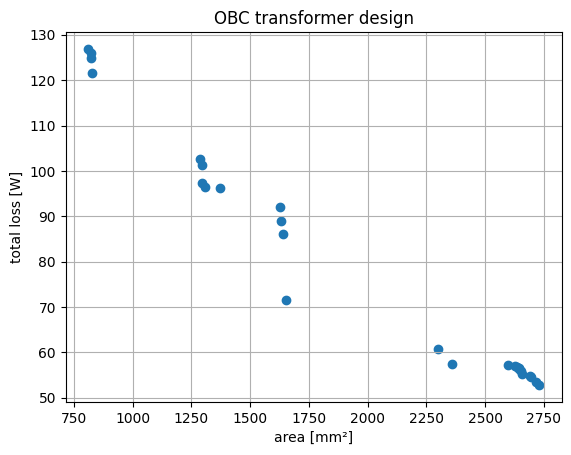

In [22]:
import matplotlib.pyplot as plt

# pymoo 결과 res에서 F를 꺼내 옵니다 (shape = [n_points, 2])
F = res.F
# F = final_F

# 1열이 f1, 2열이 f2

plt.figure()

f1_vals = F[:, 0]
f2_vals = F[:, 1]
plt.scatter(f1_vals, f2_vals)
plt.xlabel('area [mm²]')
plt.ylabel('total loss [W]')
plt.title('OBC transformer design')
plt.grid(True)
plt.show()